# ATP Tennis Data - Player Diff Stats + One Hot Encoding (All Categorical Data)


In our previous notebook, we saw that using raw player data gave us the best accuracy in Gradient Boosting. When we used diff data, we actually saw a performance decrease in our models.

The following columns were created:

* p1_ht_diff
* p1_rank_diff
* p1_seed_diff
* p1_age_diff

I'm hoping that by establishing relationships between features, this will provide our models with more information to better predict results


### Best results using raw player data

```
Model Score: 0.6833220796758946

ROC/AUC Score: 0.6833051847604916
              precision    recall  f1-score   support

        Loss       0.68      0.68      0.68      7381
         Win       0.68      0.69      0.69      7429

    accuracy                           0.68     14810
   macro avg       0.68      0.68      0.68     14810
weighted avg       0.68      0.68      0.68     14810
```

# Summary of Results

Add diff data actually brought down accuracy for most of our model, except for Logistic Regression. 

```
Model Score: 0.6602970965563808

ROC/AUC Score: 0.6603173821876497
              precision    recall  f1-score   support

        Loss       0.66      0.67      0.66      7381
         Win       0.66      0.65      0.66      7429

    accuracy                           0.66     14810
   macro avg       0.66      0.66      0.66     14810
weighted avg       0.66      0.66      0.66     14810
```



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper, RSTATE, N_JOBS, MAX_ITER, LABEL_COL

%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "diff-ohe"

# sometimes I run these notebooks via command line. Environment variable is set so we know whether we are in DEBUG mode or not
# if you want to manually run this in DEBUG mode, change default value to True
DEBUG = bool(os.environ.get("IPYNB_DEBUG", False))

if DEBUG:
    ModelWrapper.REPORT_FILE = '../reports/summary-test.csv'
    FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features_test-{DESCRIPTION}.csv'
    DESCRIPTION = f"{DESCRIPTION}-test"
else:
    # update this
    FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features-{DESCRIPTION}.csv'

START_YEAR = 1998
END_YEAR = 2018




In [2]:
X_train, X_test, y_train, y_test = ju.get_data(FEATURE_FILE, LABEL_COL, START_YEAR, END_YEAR)

In [3]:
X_test.columns

Index(['draw_size', 'round_label', 'tourney_level_label', 'tourney_month',
       'tourney_year', 'age_diff', 'ht_diff', 'seed_diff', 'rank_diff',
       'p1_hand_l',
       ...
       'p2_200436', 'p2_200484', 'p2_200514', 'p2_200611', 'p2_200615',
       'p2_202130', 'p2_202358', 'p2_202385', 'best_of_3', 'best_of_5'],
      dtype='object', length=742)

# Logistic Regression

In [4]:

# train our model

lr = ModelWrapper(LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_lr = lr.predict()

[LibLinear]

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Model Score: 0.6201232032854209

ROC/AUC Score: 0.6217104151886761
              precision    recall  f1-score   support

        Loss       0.59      0.66      0.63       234
         Win       0.65      0.58      0.61       253

    accuracy                           0.62       487
   macro avg       0.62      0.62      0.62       487
weighted avg       0.62      0.62      0.62       487

      Loss  Win
Loss   155   79
Win    106  147


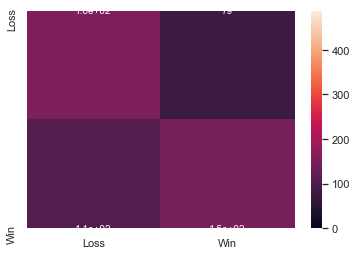

In [5]:
lr.analyze()

In [6]:
# ju.plot_2d(X_test, y_predict_lr)

In [7]:
lr.save()

Saving report: ../reports/summary-test.csv


# KNN

In [8]:

# train our model

knn = ModelWrapper(KNeighborsClassifier(n_jobs = N_JOBS),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_knn = knn.predict()

Model Score: 0.5893223819301848

ROC/AUC Score: 0.5893381980338502
              precision    recall  f1-score   support

        Loss       0.57      0.59      0.58       234
         Win       0.61      0.59      0.60       253

    accuracy                           0.59       487
   macro avg       0.59      0.59      0.59       487
weighted avg       0.59      0.59      0.59       487

      Loss  Win
Loss   138   96
Win    104  149


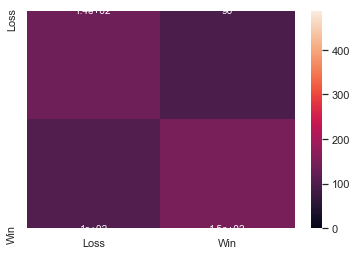

In [9]:
knn.analyze()

In [10]:
# ju.plot_2d(X_test, y_predict_knn)

In [11]:
knn.save()

Saving report: ../reports/summary-test.csv


# Decision Tree

In [12]:

# train our model

dt = ModelWrapper(DecisionTreeClassifier(random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_dt = dt.predict()

Model Score: 0.5995893223819302

ROC/AUC Score: 0.600021958717611
              precision    recall  f1-score   support

        Loss       0.58      0.61      0.59       234
         Win       0.62      0.59      0.60       253

    accuracy                           0.60       487
   macro avg       0.60      0.60      0.60       487
weighted avg       0.60      0.60      0.60       487

      Loss  Win
Loss   143   91
Win    104  149


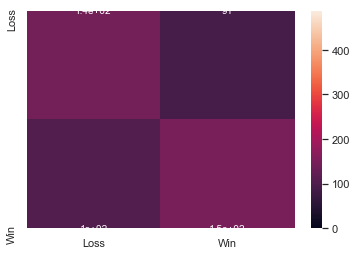

In [13]:
dt.analyze()

In [14]:
# ju.plot_2d(X_test, y_predict_dt)

In [15]:
dt.save()

Saving report: ../reports/summary-test.csv


# Random Forest Classifier

In [16]:

# train our model

rf = ModelWrapper(RandomForestClassifier(random_state=RSTATE, verbose=1),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_rf = rf.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


Model Score: 0.5564681724845996

ROC/AUC Score: 0.5610874632613764
              precision    recall  f1-score   support

        Loss       0.53      0.68      0.60       234
         Win       0.60      0.44      0.51       253

    accuracy                           0.56       487
   macro avg       0.56      0.56      0.55       487
weighted avg       0.57      0.56      0.55       487

      Loss  Win
Loss   159   75
Win    141  112


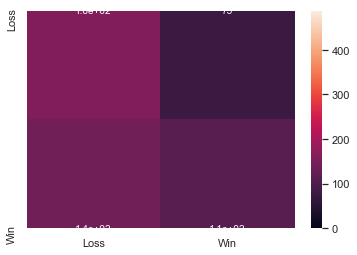

In [17]:
rf.analyze()

In [18]:
# ju.plot_2d(X_test, y_predict_rf)

In [19]:
rf.save()

Saving report: ../reports/summary-test.csv


# Gradient Boosting

In [20]:

# train our model

gb = ModelWrapper(GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_gb = gb.predict()

      Iter       Train Loss   Remaining Time 
         1           1.3572            1.67s
         2           1.3357            1.74s
         3           1.3171            1.79s
         4           1.3018            1.81s
         5           1.2885            1.81s
         6           1.2766            1.79s
         7           1.2667            1.74s
         8           1.2566            1.72s
         9           1.2484            1.74s
        10           1.2413            1.74s


Model Score: 0.6098562628336756

ROC/AUC Score: 0.608459173676565
              precision    recall  f1-score   support

        Loss       0.60      0.57      0.59       234
         Win       0.62      0.64      0.63       253

    accuracy                           0.61       487
   macro avg       0.61      0.61      0.61       487
weighted avg       0.61      0.61      0.61       487

      Loss  Win
Loss   134  100
Win     90  163


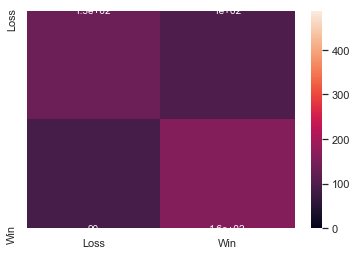

In [21]:
gb.analyze()

In [22]:
# ju.plot_2d(X_test, y_predict_gb)

In [23]:
gb.save()

Saving report: ../reports/summary-test.csv


# AdaBoost

In [24]:
ab = ModelWrapper(AdaBoostClassifier(random_state=RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_ab = ab.predict()

Model Score: 0.6057494866529775

ROC/AUC Score: 0.6064322151278674
              precision    recall  f1-score   support

        Loss       0.58      0.62      0.60       234
         Win       0.63      0.59      0.61       253

    accuracy                           0.61       487
   macro avg       0.61      0.61      0.61       487
weighted avg       0.61      0.61      0.61       487

      Loss  Win
Loss   146   88
Win    104  149


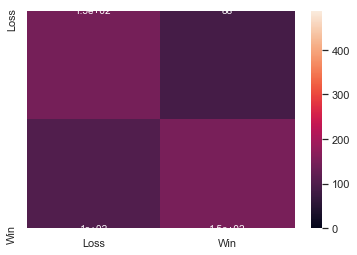

In [25]:
ab.analyze()

In [26]:
# ju.plot_2d(X_test, y_predict_ab)

In [27]:
ab.save()

Saving report: ../reports/summary-test.csv


# Results

* Decision Tree is still our best model
* no significant improvement for Adaboost
* We did see significant improvement for KNN when we used this dataset
* Gradient Boosting, Logistic Regression, Random Forest all did worse with this dataset

In [28]:
report = pd.read_csv(ModelWrapper.REPORT_FILE)
report.tail(5)

,model_name,description,data_file,start_year,end_year,accuracy,roc_auc_score,confusion_matrix,classification_report,model_file,predict_time_min,fit_time_min,total_time_min,data_filter_file
7,KNeighborsClassifier,diff-ohe-test,../datasets/atp_matches_1985-2019_features_tes...,1998,2018,0.589322,0.589338,"{""0"": {""0"": 138, ""1"": 104}, ""1"": {""0"": 96, ""1""...","{""Loss"": {""precision"": 0.5702479338842975, ""re...",../models/kneighborsclassifier-1998-2018-diff-...,0.0,0.0,0.0,NaN
8,DecisionTreeClassifier,diff-ohe-test,../datasets/atp_matches_1985-2019_features_tes...,1998,2018,0.599589,0.600022,"{""0"": {""0"": 143, ""1"": 104}, ""1"": {""0"": 91, ""1""...","{""Loss"": {""precision"": 0.5789473684210527, ""re...",../models/decisiontreeclassifier-1998-2018-dif...,0.0,0.0,0.0,NaN
9,RandomForestClassifier,diff-ohe-test,../datasets/atp_matches_1985-2019_features_tes...,1998,2018,0.556468,0.561087,"{""0"": {""0"": 159, ""1"": 141}, ""1"": {""0"": 75, ""1""...","{""Loss"": {""precision"": 0.53, ""recall"": 0.67948...",../models/randomforestclassifier-1998-2018-dif...,0.0,0.0,0.0,NaN
10,GradientBoostingClassifier,diff-ohe-test,../datasets/atp_matches_1985-2019_features_tes...,1998,2018,0.609856,0.608459,"{""0"": {""0"": 134, ""1"": 90}, ""1"": {""0"": 100, ""1""...","{""Loss"": {""precision"": 0.5982142857142857, ""re...",../models/gradientboostingclassifier-1998-2018...,0.0,0.0,0.0,NaN
11,AdaBoostClassifier,diff-ohe-test,../datasets/atp_matches_1985-2019_features_tes...,1998,2018,0.605749,0.606432,"{""0"": {""0"": 146, ""1"": 104}, ""1"": {""0"": 88, ""1""...","{""Loss"": {""precision"": 0.584, ""recall"": 0.6239...",../models/adaboostclassifier-1998-2018-diff-oh...,0.0,0.0,0.0,NaN


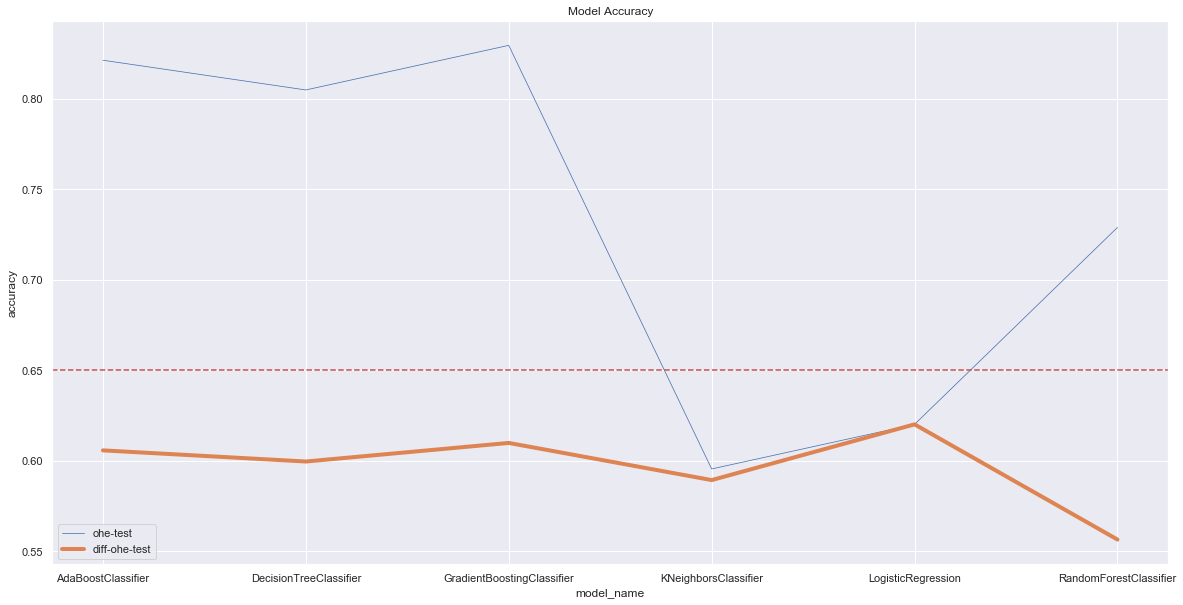

In [29]:
f, a = plt.subplots(1, 1, figsize=(20, 10))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    if desc == DESCRIPTION:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=4)
    else:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=0.75)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")
_ = a.legend(loc="lower left")

In [30]:
print(f'Last Finished: {datetime.now().strftime("%Y-%m-%d %H:%M")}')

Last Finished: 2019-10-24 00:48


In [31]:
best_model = report.loc[report[report.description == DESCRIPTION].accuracy.idxmax()].model_name
print(f'Best Model: {best_model}')
current_report = report[(report.model_name == 'GradientBoostingClassifier') &
                                  (report.description == DESCRIPTION)]
mw = ModelWrapper.get_model_wrapper_from_report(current_report)



Best Model: LogisticRegression
